<a href="https://colab.research.google.com/github/stephenwillbe/colabNotebooks/blob/master/datid3d_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enjoy DATID-3D: Diversity-Preserved Domain Adaptation Using Text-to-Image Diffusion for 3D Generative Model (CVPR 2023)

# Setup

In [ ]:
#@title Clone Our Respository and Install Packages

import os
!git clone https://github.com/gwang-kim/DATID-3D.git  
!pip install imgui==1.3.0 pyopengl==3.1.5 pyspng mrcfile transformers diffusers[torch] face_alignment mtcnn kornia dominate trimesh
!sudo apt install ninja-build 

os.chdir(f'./DATID-3D')
!mkdir finetuned

model_ckpts = {"elf": "ffhq-elf.pkl",
               "greek_statue": "ffhq-greek_statue.pkl",
               "hobbit": "ffhq-hobbit.pkl",
               "lego": "ffhq-lego.pkl",
               "masquerade": "ffhq-masquerade.pkl",
               "neanderthal": "ffhq-neanderthal.pkl",
               "orc": "ffhq-orc.pkl",
               "pixar": "ffhq-pixar.pkl",
               "skeleton": "ffhq-skeleton.pkl",
               "stone_golem": "ffhq-stone_golem.pkl",
               "super_mario": "ffhq-super_mario.pkl",
               "tekken": "ffhq-tekken.pkl",
               "yoda": "ffhq-yoda.pkl",
               "zombie": "ffhq-zombie.pkl",
               "cat_in_Zootopia": "cat-cat_in_Zootopia.pkl",
               "fox_in_Zootopia": "cat-fox_in_Zootopia.pkl",
               "golden_aluminum_animal": "cat-golden_aluminum_animal.pkl",
               }
            
from PIL import Image
from glob import glob
%load_ext autoreload
%autoreload 2

# Sample Videos

In [ ]:
model_name = 'lego' #@param["elf", "greek_statue", "hobbit", "lego", "masquerade", "neanderthal", "orc", "pixar", "skeleton", "stone_golem", "super_mario", "tekken", "yoda", "zombie", "fox_in_Zootopia", "cat_in_Zootopia", "golden_aluminum_animal"]
truncation = 0.8 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
grid_height = 2 #@param {type: "integer"}
seeds='101,102,103,105'

if model_name in ["fox_in_Zootopia", "cat_in_Zootopia", "golden_aluminum_animal"]:
  generator_type = 'cat'
else:
  generator_type = 'ffhq'

if not os.path.exists(f'finetuned/{model_ckpts[model_name]}'):
  !wget https://huggingface.co/gwang-kim/datid3d-finetuned-eg3d-models/resolve/main/finetuned_models/{model_ckpts[model_name]} -O finetuned/{model_ckpts[model_name]}


!python datid3d_test.py --mode video \
--generator_type={generator_type} \
--outdir='test_runs' \
--seeds={seeds} \
--trunc={truncation} \
--grid={grid_height}x{grid_height} \
--network=finetuned/{model_ckpts[model_name]} \
--shape=False

In [ ]:
#@title Display the Videos
from IPython.display import HTML
from base64 import b64encode
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

result_videos = sorted(glob(f'test_runs/video/*{model_ckpts[model_name]}*.mp4')) 
show_video(result_videos[0])

# Sample Images

In [ ]:
model_name = 'elf' #@param["elf", "greek_statue", "hobbit", "lego", "masquerade", "neanderthal", "orc", "pixar", "skeleton", "stone_golem", "super_mario", "tekken", "yoda", "zombie", "fox_in_Zootopia", "cat_in_Zootopia", "golden_aluminum_animal"]
truncation = 0.8 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
seeds='101,102,103,107'

if model_name in ["fox_in_Zootopia", "cat_in_Zootopia", "golden_aluminum_animal"]:
  generator_type = 'cat'
else:
  generator_type = 'ffhq'

if not os.path.exists(f'finetuned/{model_ckpts[model_name]}'):
  !wget https://huggingface.co/gwang-kim/datid3d-finetuned-eg3d-models/resolve/main/finetuned_models/{model_ckpts[model_name]} -O finetuned/{model_ckpts[model_name]}


!python datid3d_test.py --mode image \
--generator_type={generator_type} \
--outdir='test_runs' \
--seeds={seeds} \
--trunc={truncation} \
--network finetuned/{model_ckpts[model_name]} \
--shape=False

In [ ]:
#@title Display the Images
result_imgs = sorted(glob(f'test_runs/image/*{model_ckpts[model_name]}*.png'))
for img in result_imgs:
  display(Image.open(img))

# Text-guided Image-to-3D
- See the results of manipulated 3D reconstruction from the given input image or upload your custom input image in '/content/DATID-3D/input_imgs'.
- To use a new inverted latent and remove the current one, check the option 'remove_existing_inversion'.
- 'num_inversion_steps' is used for the inversion of input images. We recommend using more than 300 steps.

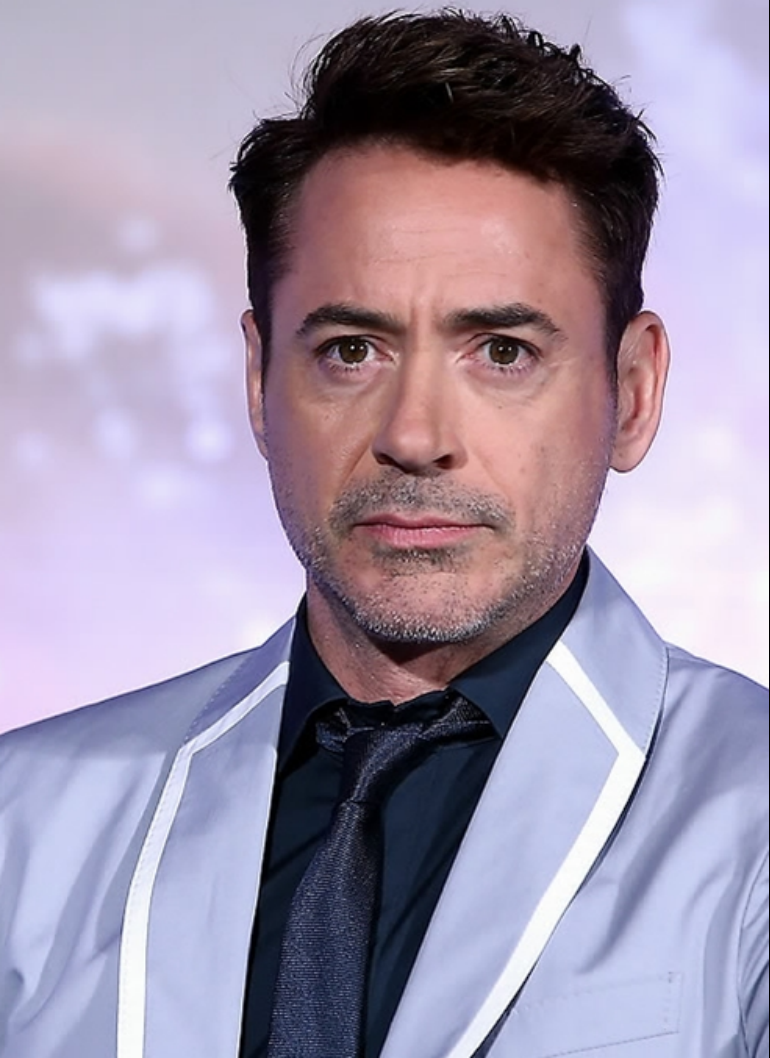

In [ ]:
#@title Display Input Images
input_imgs = sorted(glob(f'input_imgs/*.png'))
for img in input_imgs:
  if 'mask' in img:
    continue
  display(Image.open(img))

In [ ]:
import shutil

model_name = 'super_mario' #@param ["greek_statue", "lego", "neanderthal", "orc", "pixar", "skeleton", "stone_golem", "super_mario", "tekken", "yoda", "zombie", "elf"]
truncation = 0.8 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
remove_existing_inversion = False #@param {type:"boolean"}
num_inversion_steps =  300 #@param {type:"integer"}
generator_type = 'ffhq'

if not os.path.exists(f'finetuned/{model_ckpts[model_name]}'):
  !wget https://huggingface.co/gwang-kim/datid3d-finetuned-eg3d-models/resolve/main/finetuned_models/{model_ckpts[model_name]} -O finetuned/{model_ckpts[model_name]}


if remove_existing_inversion:
  if os.path.exists('test_runs/manip_3D_recon/3_inversion_result'):
    shutil.rmtree('test_runs/manip_3D_recon/3_inversion_result')

w_pths = sorted(glob('test_runs/manip_3D_recon/3_inversion_result/*.pt'))
if len(w_pths) == 0:
  mode = 'manip'
else:
  mode = 'manip_from_inv'
  
!python datid3d_test.py --mode {mode} \
  --indir='input_imgs' \
  --generator_type={generator_type} \
  --outdir='test_runs' \
  --trunc={truncation} \
  --network=finetuned/{model_ckpts[model_name]} \
  --num_inv_steps={num_inversion_steps} \
  --shape=False


Aligned images


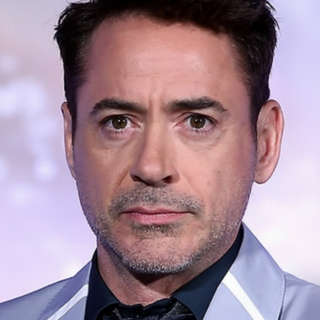


Result of manipulated 3D reconstuction


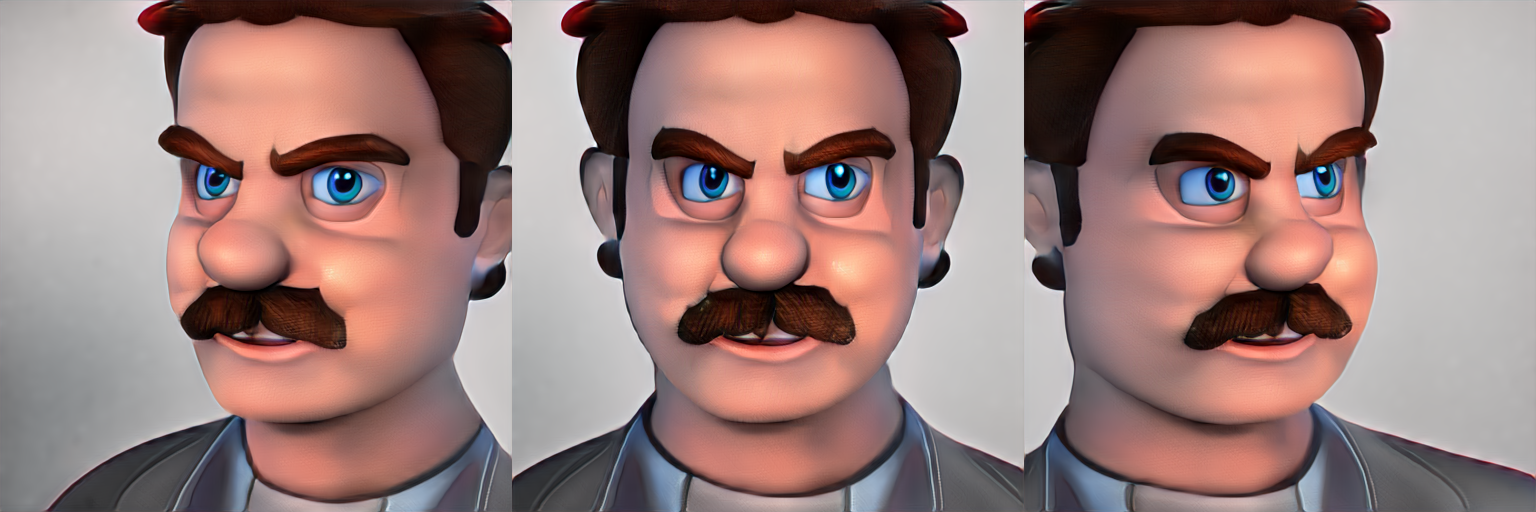

In [ ]:
#@title Display the Images
print("Aligned images")
result_imgs = sorted(glob(f'test_runs/manip_3D_recon/2_pose_result/*.png'))
for img in result_imgs:
  display(Image.open(img).resize((320,320)))
print()

print("Result of manipulated 3D reconstuction")
result_imgs = sorted(glob(f'test_runs/manip_3D_recon/4_manip_result/*{model_ckpts[model_name]}*.png'))
for img in result_imgs:
  display(Image.open(img))

In [ ]:
#@title Display the Videos
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

result_videos = sorted(glob(f'test_runs/manip_3D_recon/4_manip_result/*{model_ckpts[model_name]}*.mp4')) 
show_video(result_videos[0])


